"We certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that we did not receiveany external help, coaching or contributions during the production of this work."
<br>
<br>
Ram Chandra Bhavirisetty <br>
Tejaswi Raavi

<center><h3> Part 1</h3></center>

<h3> Step 1.1 Import Necessary Libraries</h3>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping as e_stopping
from keras.callbacks import LearningRateScheduler as lrs

<h3> Step 1.2 Load The Data </h3>

In [ ]:
data = pd.read_csv("income_dataset.csv")

<h3> Step 1.3 Analyzing The Data </h3>

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.shape

(32561, 15)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<h3> Step 1.4 Preprocessing The Data </h3><br>
<b><p> 1. dropping the capital.gain column </p></b>

In [ ]:
data.drop(['capital.gain'],axis=1,inplace=True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,3900,40,United-States,<=50K


<b><p>2. Finding the names of the columns which contains '?' and replacing with the mode of that column .</p></b>

In [ ]:
l = []
for i in data.columns:
    if '?' in set(data[i]):
        l.append(i)
l

['workclass', 'occupation', 'native.country']

In [ ]:
for i in l:
    mode = data[i].mode()
    data[i].replace({'?':mode[0]},inplace = True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,3900,40,United-States,<=50K


<b><p> 3. Replacing categorical data with numericals. </p></b>

In [ ]:
def create_dict(column):
    set_data = list(set(data[column]))
    return dict(zip(set_data,list(range(1,len(set_data)+1))))

def replace_data(column,dicts):
    data[column].replace(dicts,inplace=True)
    

In [ ]:
for i in data.select_dtypes(include=object).columns:
    replace_data(i,create_dict(i))
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,4,77053,13,9,1,6,2,5,1,4356,40,12,1
1,82,4,132870,13,9,1,9,2,5,1,4356,18,12,1
2,66,4,186061,11,10,1,6,6,2,1,4356,40,12,1
3,54,4,140359,12,4,2,7,6,5,1,3900,40,12,1
4,41,4,264663,11,10,4,6,1,5,1,3900,40,12,1


<BarContainer object of 11 artists>

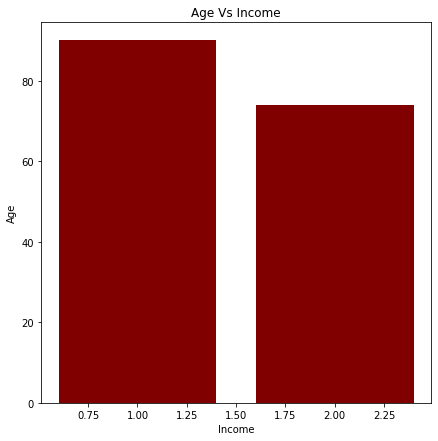

In [ ]:
agee = data.loc[0:10,'age']
incomee = data.loc[0:10,'income']
fig = plt.figure(figsize =(7, 7))
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Age Vs Income")
plt.bar(incomee, agee, color ='maroon')

<BarContainer object of 11 artists>

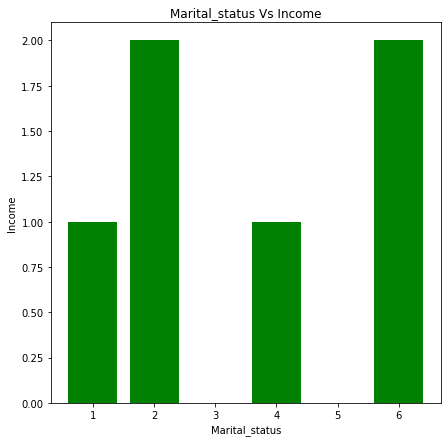

In [ ]:
ms = data.loc[0:10,'marital.status']
income = data.loc[0:10,'income']
fig = plt.figure(figsize =(7, 7))
plt.xlabel("Marital_status")
plt.ylabel("Income")
plt.title("Marital_status Vs Income")
plt.bar(ms, income, color ='green')

<b><p> 4. Normalizing Data.</p></b>

In [ ]:
for i in data.columns:
    num = data[i] - min(data[i])
    denom = max(data[i]) - min(data[i])
    data.loc[:,i] = num/denom

In [ ]:
data.head(8)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,1.000000,0.428571,0.043987,0.800000,0.533333,0.000000,0.384615,0.2,1.00,0.0,1.000000,0.397959,0.275,0.0
1,0.890411,0.428571,0.081896,0.800000,0.533333,0.000000,0.615385,0.2,1.00,0.0,1.000000,0.173469,0.275,0.0
2,0.671233,0.428571,0.118021,0.666667,0.600000,0.000000,0.384615,1.0,0.25,0.0,1.000000,0.397959,0.275,0.0
3,0.506849,0.428571,0.086982,0.733333,0.200000,0.166667,0.461538,1.0,1.00,0.0,0.895317,0.397959,0.275,0.0
4,0.328767,0.428571,0.171404,0.666667,0.600000,0.500000,0.384615,0.0,1.00,0.0,0.895317,0.397959,0.275,0.0
5,0.232877,0.428571,0.138941,0.800000,0.533333,0.166667,1.000000,1.0,1.00,0.0,0.865473,0.448980,0.275,0.0
6,0.287671,0.428571,0.093938,0.333333,0.333333,0.500000,0.692308,1.0,1.00,1.0,0.865473,0.397959,0.275,0.0
7,0.780822,0.714286,0.051855,0.600000,1.000000,0.833333,0.384615,0.8,1.00,0.0,0.845500,0.193878,0.275,1.0


<b><p>5.Getting all columns with Positive correlation using Correlation Map</p></b>

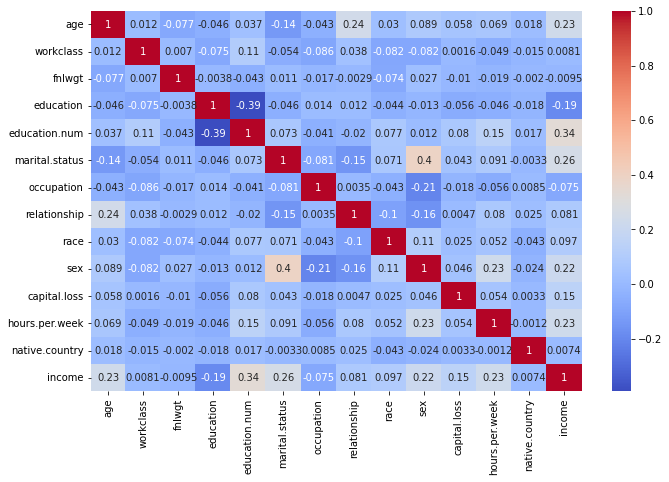

In [ ]:
data_corr = data.corr()
f = plt.figure(figsize = (11,7))
sb.heatmap(data_corr, annot = True, cmap = 'coolwarm' )

<b><p> 6. Splitting the data into Train and Test set </p></b>

In [ ]:
X = data[data.columns[:-1]]
Y = data['income'] #[output_col]

X1 = data[data.columns[:-1]]
Y1 = data['income'] 

In [ ]:

n = len(data)

train_len = int(n*0.7)
test_len = n - train_len

train_x = np.array(X.iloc[:train_len])
train_y = np.array(Y.iloc[:train_len]).reshape((train_len,1))

test_x = np.array(X.iloc[train_len:])
test_y = np.array(Y.iloc[train_len:]).reshape((test_len,1))

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((22792, 13), (22792, 1), (9769, 13), (9769, 1))

<h3> Step 2: Deciding the Neural Network Architecture </h3>
<p> Using Sequential model from keras library to create NN Architecture, it consists of 1 input layer, 3 hidden layers and 1 Output layer.</p>

In [ ]:
class N_Network():
    def __init__(self,model,h1_nodes,h2_nodes,h3_nodes,input_nodes,dropout):

        h_layer1 = Dense(h1_nodes,input_dim=input_nodes, activation='linear')
        model.add(h_layer1)

        h_layer2 = Dense(h2_nodes, activation='linear')
        model.add(h_layer2)
        
        #model.add(Dropout(dropout))

        h_layer3 = Dense(h3_nodes, activation='relu')
        model.add(h_layer3)
        
        output_layer = Dense(1, activation='sigmoid')
        model.add(output_layer)
        
    def compile_NN(self,model,loss_func,optimizer):
        model.compile(loss=loss_func, optimizer=optimizer, metrics=['accuracy'])
    
    def fit(self,model,x,y,epochs,batch_size,verbose):
        #callback = e_stopping(monitor = 'loss', patience = 3,mode = 'auto')
        m = model.fit(x, y, epochs = epochs, batch_size = batch_size, verbose = verbose,validation_data=(test_x,test_y))
        return m
    
    def evaluate(self,model,x,y,verbose):
        return model.evaluate(x, y,verbose=verbose)

In [ ]:

model = Sequential()
h1,h2,h3 = 1250,30,30

epochs,batch_size = 50,64

optimizer = 'adam'

obj1 = N_Network(model,h1,h2,h3,13,0)

obj1.compile_NN(model,'MeanSquaredError',optimizer)

m = obj1.fit(model,train_x,train_y,epochs,batch_size,1)

train_loss,train_accuracy = obj1.evaluate(model,train_x,train_y,1)
test_loss,test_accuracy = obj1.evaluate(model,test_x,test_y,1)

print('Train_Accuracy: {:2f}'.format(train_accuracy*100))
print('Test_Accuracy: {:2f}' .format(test_accuracy*100))



Epoch 1/50
382/382 [==============================] - 2s 4ms/step - loss: 0.1405 - accuracy: 0.7919 - val_loss: 0.1161 - val_accuracy: 0.8273
Epoch 2/50
382/382 [==============================] - 2s 4ms/step - loss: 0.1276 - accuracy: 0.8096 - val_loss: 0.1079 - val_accuracy: 0.8442
Epoch 3/50
382/382 [==============================] - 2s 4ms/step - loss: 0.1250 - accuracy: 0.8145 - val_loss: 0.1079 - val_accuracy: 0.8423
Epoch 4/50
382/382 [==============================] - 2s 4ms/step - loss: 0.1229 - accuracy: 0.8190 - val_loss: 0.1037 - val_accuracy: 0.8462
Epoch 5/50
382/382 [==============================] - 2s 4ms/step - loss: 0.1228 - accuracy: 0.8176 - val_loss: 0.1042 - val_accuracy: 0.8463
Epoch 6/50
382/382 [==============================] - 2s 4ms/step - loss: 0.1205 - accuracy: 0.8222 - val_loss: 0.1061 - val_accuracy: 0.8431
Epoch 7/50
382/382 [==============================] - 2s 4ms/step - loss: 0.1211 - accuracy: 0.8209 - val_loss: 0.1085 - val_accuracy: 0.8407
Epoch 

<b><p>Compiling, Training and Evaluating the Model. </p></b>

In [ ]:
accuracies = m.history['accuracy']
loss = m.history['loss']
val_loss = m.history['val_loss']
val_accuracies = m.history['val_accuracy']
weights = model.weights


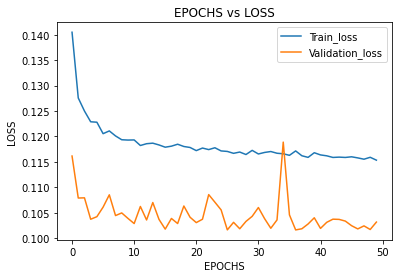

In [ ]:
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.title("EPOCHS vs LOSS")
plt.plot(list(range(epochs)),loss)
plt.plot(list(range(epochs)),val_loss)
plt.legend(["Train_loss","Validation_loss"],loc = 'upper right')

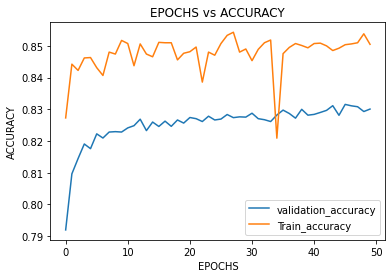

In [ ]:
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),accuracies)
plt.plot(list(range(epochs)),val_accuracies)
plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')

In [ ]:
pred = (model.predict(test_x) >= 0.5).astype(int)
count = pd.DataFrame(pred == test_y).value_counts()
Acc = (count[True]/(count[True]+count[False]))*100
print("Testing Loss: ",test_loss)
print("Testing Accuracy of the model: ",Acc)

Testing Loss:  0.10316208004951477
Testing Accuracy of the model:  85.04914004914005


In [ ]:
pred = (model.predict(train_x) >= 0.5).astype(int)
count = pd.DataFrame(pred == train_y).value_counts()
Acc = (count[True]/(count[True]+count[False]))*100
print("Testing Loss: ",train_loss)
print("Training Accuracy of the model: ",Acc)

Testing Loss:  0.11324722319841385
Training Accuracy of the model:  83.36677449735883


*References*: 

https://www.tutorialspoint.com/keras/keras_convolution_neural_network.htm <br>
https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a <br>
https://www.analyticsvidhya.com/blog/2021/11/training-neural-network-with-keras-and-basics-of-deep-learning/ <br>